In [1]:
import tensorflow as tf
import numpy as np
import transform_data

np.random.seed(42)
tf.random.set_seed(42)

tf.get_logger().setLevel('ERROR')
physical_devices = tf.config.list_physical_devices('GPU')

for pd_dev in range(len(physical_devices)):
    tf.config.experimental.set_memory_growth(physical_devices[pd_dev], True)


def get_GPU_count():
    GPU_count = len(tf.config.list_physical_devices('GPU'))
    return GPU_count

In [2]:
print(get_GPU_count())

1


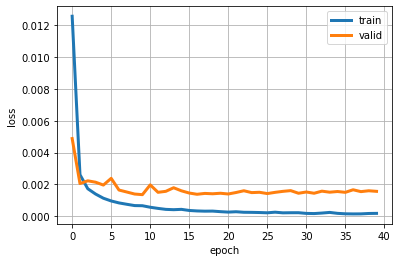

In [127]:
import matplotlib.pyplot as plt
#Return value hist from the model fit can be used to plot
plt.plot(history.history['loss'], linewidth=3, label='train')
plt.plot(history.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.ylim(1e-3, 1e-2)
#plt.yscale('log')
plt.show()

In [128]:
# predict
print("opening pickle file")
#Get the clean train files
#test = pickle.load( open( "../data/clean_test.p", "rb" ) )
test = pickle.load( open( "../data/test.p", "rb" ) )
clean_test = test.drop(['index', 'check_sum'], axis=1)





opening pickle file


In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(dev_images[i], dev_labels[i], axis)

plt.show()

In [130]:
import imp
imp.reload(transform_data)

print("opening pickle file")
#Get the clean train files
#test = pickle.load( open( "../data/clean_test.p", "rb" ) )
test = pickle.load( open( "../data/test.p", "rb" ) )
print(test.shape)
clean_test = test.drop(['index', 'check_sum'], axis=1)

generate_prediction("model_path", "model_name", Y, clean_test, verbose = True)

opening pickle file
(1783, 4)
loading pickle file
pickle file loaded
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
Predictions written 


In [ ]:
id_lookup = pickle.load( open( "../Data/id_lookup.p", "rb" ) )
print list(set(id_lookup.ima)-set(Z))

## Model

In [9]:
import os
files = os.listdir("../CleanTrain")

for filename in files:
    print("Opening file: ", filename)
    clean_file = "".join(("../CleanTrain/",filename))
    train_data = pickle.load( open( clean_file, "rb" ) )
    
    print("Augmenting Data")
    train_data.rename(columns = {'level_0' : 'index'}, inplace = True)
    augmented_data = augment_missing_data(train_data.loc[:, train_data.columns != 'image'])
    print("Augmented data shape: ", augmented_data.shape)

    print("Pickle Augmented file")
    aug_file = "".join(("c:/Data/Augmented/aug_",filename))
    #Pickle train and test so that we can jump in with cleaning this data
    pickle.dump( augmented_data, open( aug_file, "wb" ) )
    print()

Opening file:  clean_all_outliers.p
Augmenting Data


NameError: name 'augment_missing_data' is not defined

In [1]:
### this is gold right here.
import load_models
import imp
imp.reload(load_models)
#(self, model_dir, pickle_path, verbose = False)
trainer = load_models.LoadTrainModels("C:/data/Jackie_Lenet5", "../CleanTrain")

trainer.print_paths()

ModuleNotFoundError: No module named 'utils'

In [2]:
### this is gold right here.
#train_lenet5(self, model_name, pickle_file, split=True, X=None, Y=None, verbose = True)
import os
import imp
import pickle

imp.reload(load_models)

files = os.listdir("../CleanTrain")

for filename in files:
    
    print("Opening file: ", filename)
    clean_file = "".join(("../CleanTrain/",filename))
    train_data = pickle.load( open( clean_file, "rb" ) )
    train_data = train_data.drop(['level_0', 'check_sum', 'index'], axis=1,errors='ignore')
    
    #only take the items with 30 features
    train_data = train_data[(train_data.isnull().sum(axis=1) == 0)]
    
    print("Train Shape:", train_data.shape)

    filename = str(filename).replace('.p', '').strip()
    print("Begin model and train:")
    model_name = "".join((filename,"_Lenet5"))
    print("Model name:", model_name)
    model, history = trainer.train_lenet5(model_name, train_data,verbose = True)
    print("End model and train")    
    print()




Opening file:  clean_all_outliers.p
Train Shape: (2140, 31)
Begin model and train:
Model name: clean_all_outliers_Lenet5
Scaling 2140 images...
Scaling of 2140 observations complete.
Begining the split of Train with all features
Looking for model LeNet5
LeNet5 model file not found. Model creation begnining
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 6)         60        
_________________________________________________________________
re_lu (ReLU)                 (None, 94, 94, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 47, 47, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 16)        880       
_________________________________________________________________
re_lu_1 (ReL

In [1]:
import torch
torch.cuda.is_available()

True

# Predict


In [4]:
### this is gold right here.
import predict_models
import imp
imp.reload(predict_models)


id_lookup = pickle.load( open( "../Data/id_lookup.p", "rb" ) )
#(self, model_dir,pred_dir, ids, verbose = False):
predictor = predict_models.PredictModels("C:/data/Jackie_Lenet5", "C:/data/Predictions/", id_lookup)

predictor.print_paths()



Model dir: C:/data/Jackie_Lenet5/
Pickle dir: C:/data/Predictions/


In [23]:
#single test of predict.
#predict_lenet5(self, model_name,model_file, model_json, test, scale = True, X=None, verbose = False)
test = pickle.load( open( "../data/test.p", "rb" ) )
model_file = "clean_all_outliers_Lenet5.h5"
model_json = "clean_all_outliers_Lenet5.json"
base_name = filename[:-3]
Y= predictor.predict_lenet5("clean_all_outliers_Lenet5", model_file, model_json, test)

Scaling 1783 images...
Scaling of 1783 observations complete.
Begining the split of Test
got unique ids
test subset shape: (1783, 4)
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
C:/data/Predictions/clean_all_outliers_Lenet5Pred.csv
Predictions written 


In [7]:
#golden
import os
import imp
import pickle
import predict_models
import transform_data
imp.reload(predict_models)
imp.reload(transform_data)

id_lookup = pickle.load( open( "../Data/id_lookup.p", "rb" ) )
test = pickle.load( open( "../data/test.p", "rb" ) )
print("Test shape:", test.shape)
# split test into prediction for those with > 8 points and those with <= 8 points
#df = id_lookup.groupby(by='image_id').feature_name.count().reset_index()
#pred8_image_id = df[(df.feature_name <= 8)].image_id.unique()

#test = test[~(test.image_id.isin(pred8_image_id))]

print("Test shape:", test.shape)

file_path = "c:/Data/Jackie_Lenet5"
pred_path = "C:/data/Predictions/"

#(self, model_dir,pred_dir, ids, verbose = False):
predictor = predict_models.PredictModels(file_path,pred_path , id_lookup)

predictor.print_paths()

files = os.listdir(file_path)

for filename in files:
    if ".h5" in filename:
        base_name = filename[:-3]
        model_json = ''.join((base_name,".json"))
        print("Working with: ", base_name)
        print("Begin Predict")
        Y= predictor.predict_lenet5(base_name, filename, model_json, test)
        print("End model and train")    
        print()


Test shape: (1783, 4)
Test shape: (1783, 4)
Model dir: c:/Data/Jackie_Lenet5/
Pickle dir: C:/data/Predictions/
Working with:  clean_all_outliers_Lenet5
Begin Predict
Scaling 1783 images...
Scaling of 1783 observations complete.
Begining the split of Test
got unique ids
test subset shape: (1783, 4)
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
C:/data/Predictions/clean_all_outliers_Lenet5Pred.csv
Predictions written 
End model and train



In [7]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [9]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

False

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
if get_GPU_count() > 1: 
    dev = "/cpu:0"
    print("hi")
else: 
   dev = "/gpu:0"
   print("no")

no


In [24]:
filename = "hi.p5"
newfilename = filename[:-3]
print(newfilename)

hi
